In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import datasets
from pandas.plotting import scatter_matrix

In [2]:
# Set font to match Latex
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
})

Problem 1: Preprocessing the dataset

In [3]:
col_names = ['area', 'perimeter', 'compactness','kernel_length','kernel_width','asymmetry_coef','kernel_groove_length','numerical_class']

df = pd.read_csv('seeds.tsv',sep='\t', header=None, names=col_names) 
df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length,numerical_class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [4]:
#Normalization of data - MinMmax Scaler
scaler_minmax = MinMaxScaler(feature_range=(1,10))
norm_df = scaler_minmax.fit_transform(df)
norm_df = pd.DataFrame(norm_df, columns=col_names)
norm_df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length,numerical_class
0,4.968839,5.518595,6.137024,5.378378,5.374911,2.703715,4.106352,1.0
1,4.645892,5.016529,6.961887,4.319257,5.509622,1.295947,2.936484,1.0
2,4.144476,4.123967,8.913793,2.986486,5.535282,3.263077,2.355982,1.0
3,3.762040,3.845041,8.137931,3.153716,5.804704,2.748183,2.267356,1.0
4,5.716714,5.797521,8.783122,4.846284,6.978617,1.690309,3.906942,1.0
...,...,...,...,...,...,...,...,...
205,2.359773,2.469008,6.733212,2.206081,3.251604,4.353717,2.555391,10.0
206,1.543909,1.873967,4.511797,2.221284,2.058446,5.165845,3.144756,10.0
207,3.218130,3.324380,7.549909,2.707770,4.861725,9.835000,3.379616,10.0
208,2.062323,2.487603,4.593466,2.398649,2.321454,4.315100,3.326440,10.0


In [5]:
#Standardization of data - Standard Scaler (currently not using)
scaler_standard = StandardScaler()
standard_df = scaler_standard.fit_transform(df)
standard_df = pd.DataFrame(standard_df, columns=col_names)
standard_df

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length,numerical_class
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,-1.224745
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,-1.224745
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,-1.224745
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,-1.224745
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,-1.224745
...,...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413,1.224745
206,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156,1.224745
207,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060,1.224745
208,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.068135,-0.742535,1.224745


Problem 2: Determining the appropriate number of clusters

In [6]:
# Set the Species label aside by dropping it
df_new = norm_df.drop('numerical_class', axis=1)
df_new

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coef,kernel_groove_length
0,4.968839,5.518595,6.137024,5.378378,5.374911,2.703715,4.106352
1,4.645892,5.016529,6.961887,4.319257,5.509622,1.295947,2.936484
2,4.144476,4.123967,8.913793,2.986486,5.535282,3.263077,2.355982
3,3.762040,3.845041,8.137931,3.153716,5.804704,2.748183,2.267356
4,5.716714,5.797521,8.783122,4.846284,6.978617,1.690309,3.906942
...,...,...,...,...,...,...,...
205,2.359773,2.469008,6.733212,2.206081,3.251604,4.353717,2.555391
206,1.543909,1.873967,4.511797,2.221284,2.058446,5.165845,3.144756
207,3.218130,3.324380,7.549909,2.707770,4.861725,9.835000,3.379616
208,2.062323,2.487603,4.593466,2.398649,2.321454,4.315100,3.326440


/Users/idalinnakallio/anaconda3/envs/dat656/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/idalinnakallio/anaconda3/envs/dat656/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/idalinnakallio/anaconda3/envs/dat656/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/idalinnakallio/anaconda3/envs/dat656/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

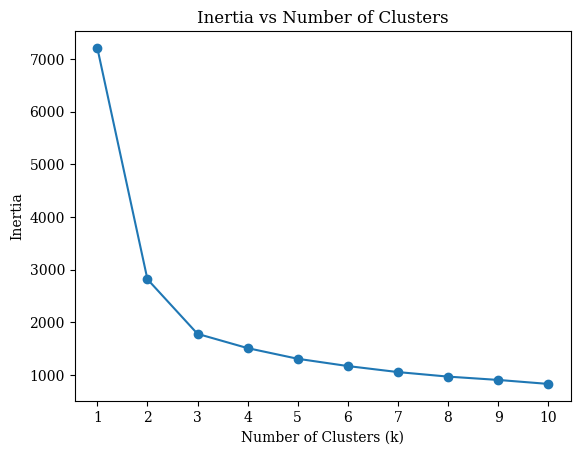

In [7]:
k_values = range(1, 11)  # Try k from 1 to 10

# Compute inertia for each value of k
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_new)  
    inertia_values.append(kmeans.inertia_)
    

# Plot the inertia as a function of k
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.xticks(k_values)

plt.savefig('inertia.pdf')

plt.show()

By examining the plot of inertia versus the number of clusters (k), you can identify the appropriate number of clusters. Typically, the appropriate number of clusters (k) can be determined by looking for an "elbow" point in the plot, where the inertia starts to decrease at a slower rate. This point indicates the number of clusters beyond which the marginal gain in inertia reduction diminishes significantly. However, the choice of the appropriate number of clusters also depends on the specific context of your data and the goals of your analysis.

Problem 3

a)

In [8]:
col_names_new = df_new.columns
col_names_new

kmeans2 = KMeans(n_clusters=3, random_state=42)
kmeans2.fit(df_new)

df_new['labels'] = kmeans2.labels_



/Users/idalinnakallio/anaconda3/envs/dat656/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
df_new['labels'].unique

<bound method Series.unique of 0      2
1      2
2      2
3      2
4      2
      ..
205    1
206    1
207    1
208    1
209    1
Name: labels, Length: 210, dtype: int32>

/Users/idalinnakallio/anaconda3/envs/dat656/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/idalinnakallio/anaconda3/envs/dat656/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/idalinnakallio/anaconda3/envs/dat656/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/idalinnakallio/anaconda3/envs/dat656/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning

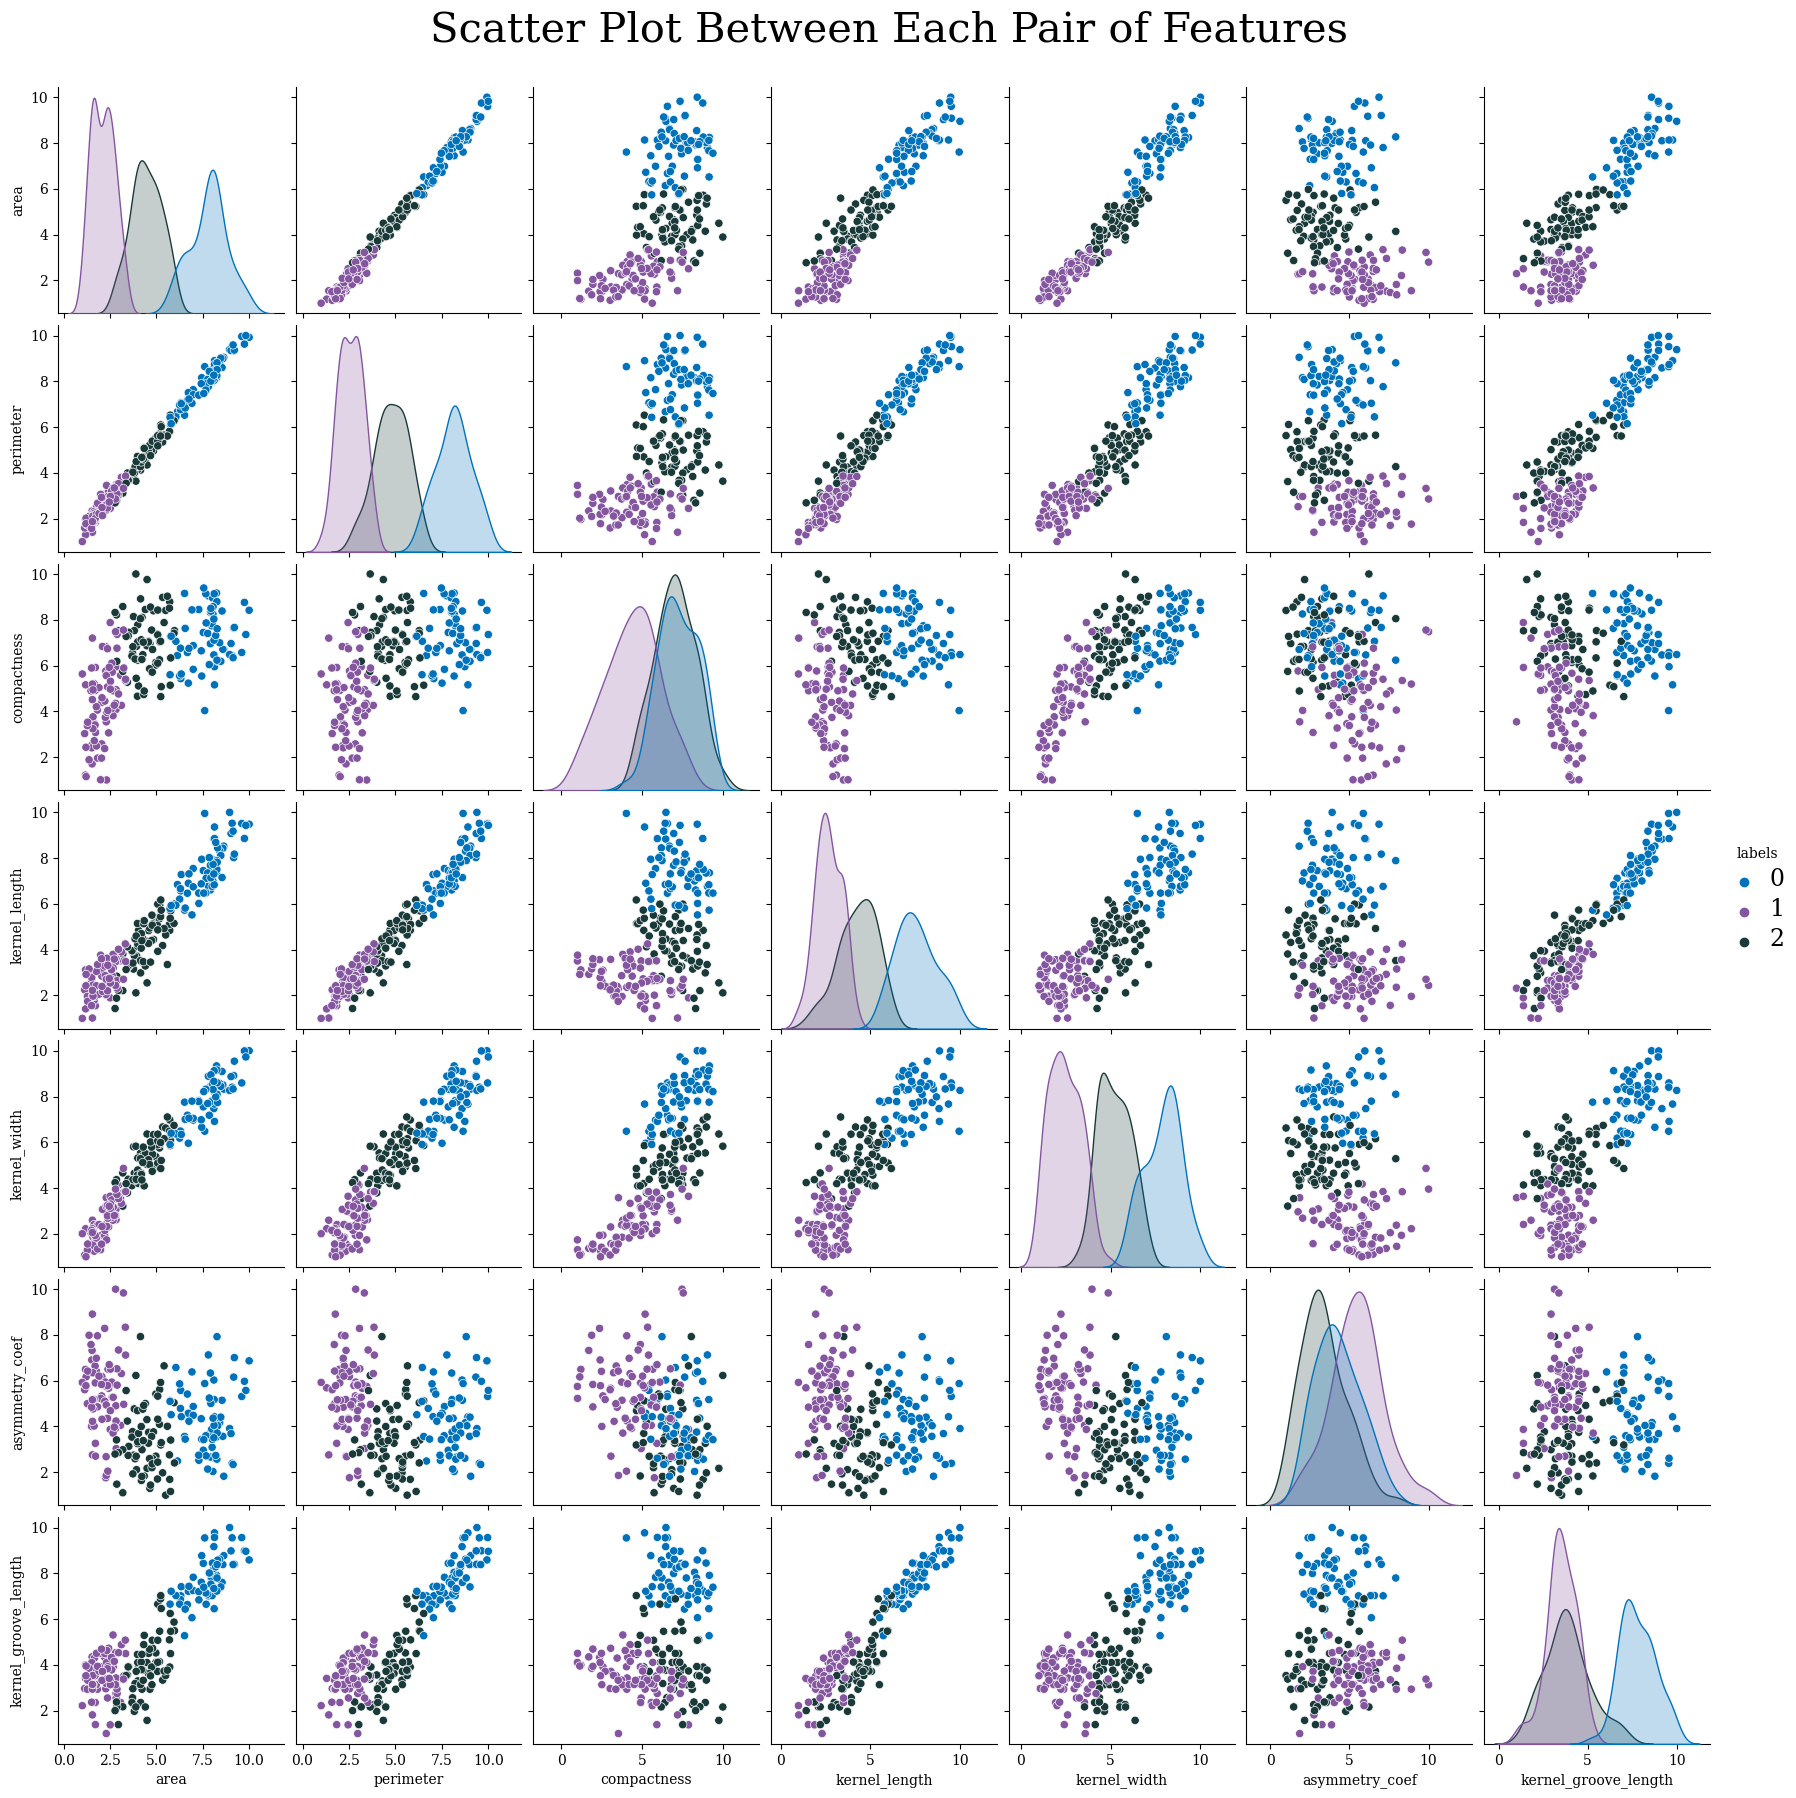

In [10]:
palette = {0:'#0072BB', 1:'#84569F', 2:'#1A3A3A'}
pairp = sns.pairplot(df_new, kind='scatter', hue='labels', palette=palette)
pairp.figure.suptitle("Scatter Plot Between Each Pair of Features", y=1.03, fontsize=30)
plt.setp(pairp.legend.get_texts(), fontsize='17')

plt.savefig('pairplt.pdf')


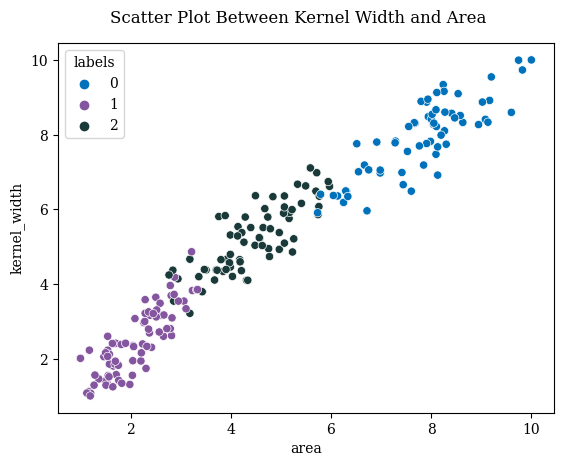

In [11]:
scatterp = sns.scatterplot(df_new, x='area',y='kernel_width', hue='labels', palette=palette)
scatterp.figure.suptitle("Scatter Plot Between Kernel Width and Area", y=0.95, fontsize=12)

plt.savefig('scatterplt.pdf')